In [16]:
from langchain.llms import GooglePalm
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.environ['GOOGLE_API_KEY']
llm = GooglePalm(google_api_key=api_key,
                 temperature=0.7)
poem = llm('Write a 4 line poem on India')
print(poem)

Land of mystery and culture,
Home to the Taj Mahal and the Ganges.
A land of contrasts and beauty,
India, you are a land like no other.


### CSV Loader using Langchain

In [17]:
from langchain.document_loaders.csv_loader import CSVLoader
loader = CSVLoader(file_path='codebasics_faqs_file.csv',source_column='prompt',encoding='latin1')
data = loader.load()
data

[Document(page_content='prompt: I have never done programming in my life. Can I take this bootcamp?\nresponse: Yes, this is the perfect bootcamp for anyone who has never done coding and wants to build a career in the IT/Data Analytics industry or just wants to perform better in your current job or business using data.', metadata={'source': 'I have never done programming in my life. Can I take this bootcamp?', 'row': 0}),
 Document(page_content='prompt: Why should I trust Codebasics?\nresponse: Till now 9000 + learners have benefitted from the quality of our courses. You can check the review section and also we have attached their LinkedIn profiles so that you can connect with them and ask directly.', metadata={'source': 'Why should I trust Codebasics?', 'row': 1}),
 Document(page_content='prompt: Is there any prerequisite for taking this bootcamp ?\nresponse: Our bootcamp is specifically designed for beginners with no prior experience in this field. The only prerequisite is that you ne

### HuggingFace Instructor Embeddings

In [19]:
from langchain.embeddings import HuggingFaceInstructEmbeddings
embeddings = HuggingFaceInstructEmbeddings(
    model_name = 'hkunlp/instructor-large',
    query_instruction='Represent the query for retrieval'
)
e = embeddings.embed_query('What is your refund policy')
e


.gitattributes: 100%|██████████| 1.48k/1.48k [00:00<?, ?B/s]
2_Dense/config.json: 100%|██████████| 116/116 [00:00<?, ?B/s] 
pytorch_model.bin: 100%|██████████| 3.15M/3.15M [00:00<00:00, 8.60MB/s]
README.md: 100%|██████████| 66.3k/66.3k [00:00<00:00, 5.06MB/s]
config.json: 100%|██████████| 1.53k/1.53k [00:00<?, ?B/s]
config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<?, ?B/s] 
pytorch_model.bin: 100%|██████████| 1.34G/1.34G [03:33<00:00, 6.28MB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<?, ?B/s]
special_tokens_map.json: 100%|██████████| 2.20k/2.20k [00:00<?, ?B/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 7.64MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 3.41MB/s]
tokenizer_config.json: 100%|██████████| 2.41k/2.41k [00:00<?, ?B/s]
modules.json: 100%|██████████| 461/461 [00:00<00:00, 460kB/s]


load INSTRUCTOR_Transformer
max_seq_length  512


[-0.04264936223626137,
 0.011375147849321365,
 0.009042666293680668,
 0.019408104941248894,
 0.035921644419431686,
 0.06263746321201324,
 0.016683634370565414,
 0.015665864571928978,
 -0.02349185384809971,
 0.03346644341945648,
 0.03790685907006264,
 -0.024800242856144905,
 0.04927147552371025,
 0.04035145789384842,
 -0.05621181055903435,
 -0.04235250875353813,
 -0.0679643303155899,
 -0.02762100286781788,
 -0.031198706477880478,
 0.01093912310898304,
 0.0655771940946579,
 -0.006180081982165575,
 -0.01074620895087719,
 0.020321138203144073,
 0.005322606302797794,
 0.01584499701857567,
 -0.012698546051979065,
 0.02947169356048107,
 0.05888218805193901,
 -0.04758934676647186,
 0.01423339731991291,
 -0.02709241956472397,
 -0.05796300247311592,
 -0.043334487825632095,
 -0.020663265138864517,
 0.027552926912903786,
 0.02286193147301674,
 0.011958236806094646,
 0.032108329236507416,
 0.002697382587939501,
 0.007939440198242664,
 0.013971295207738876,
 0.04877471178770065,
 -0.0480043888092041

We will use default model and query for EdTech - QA

For Every sentence in Instructor Embedding you give instruction

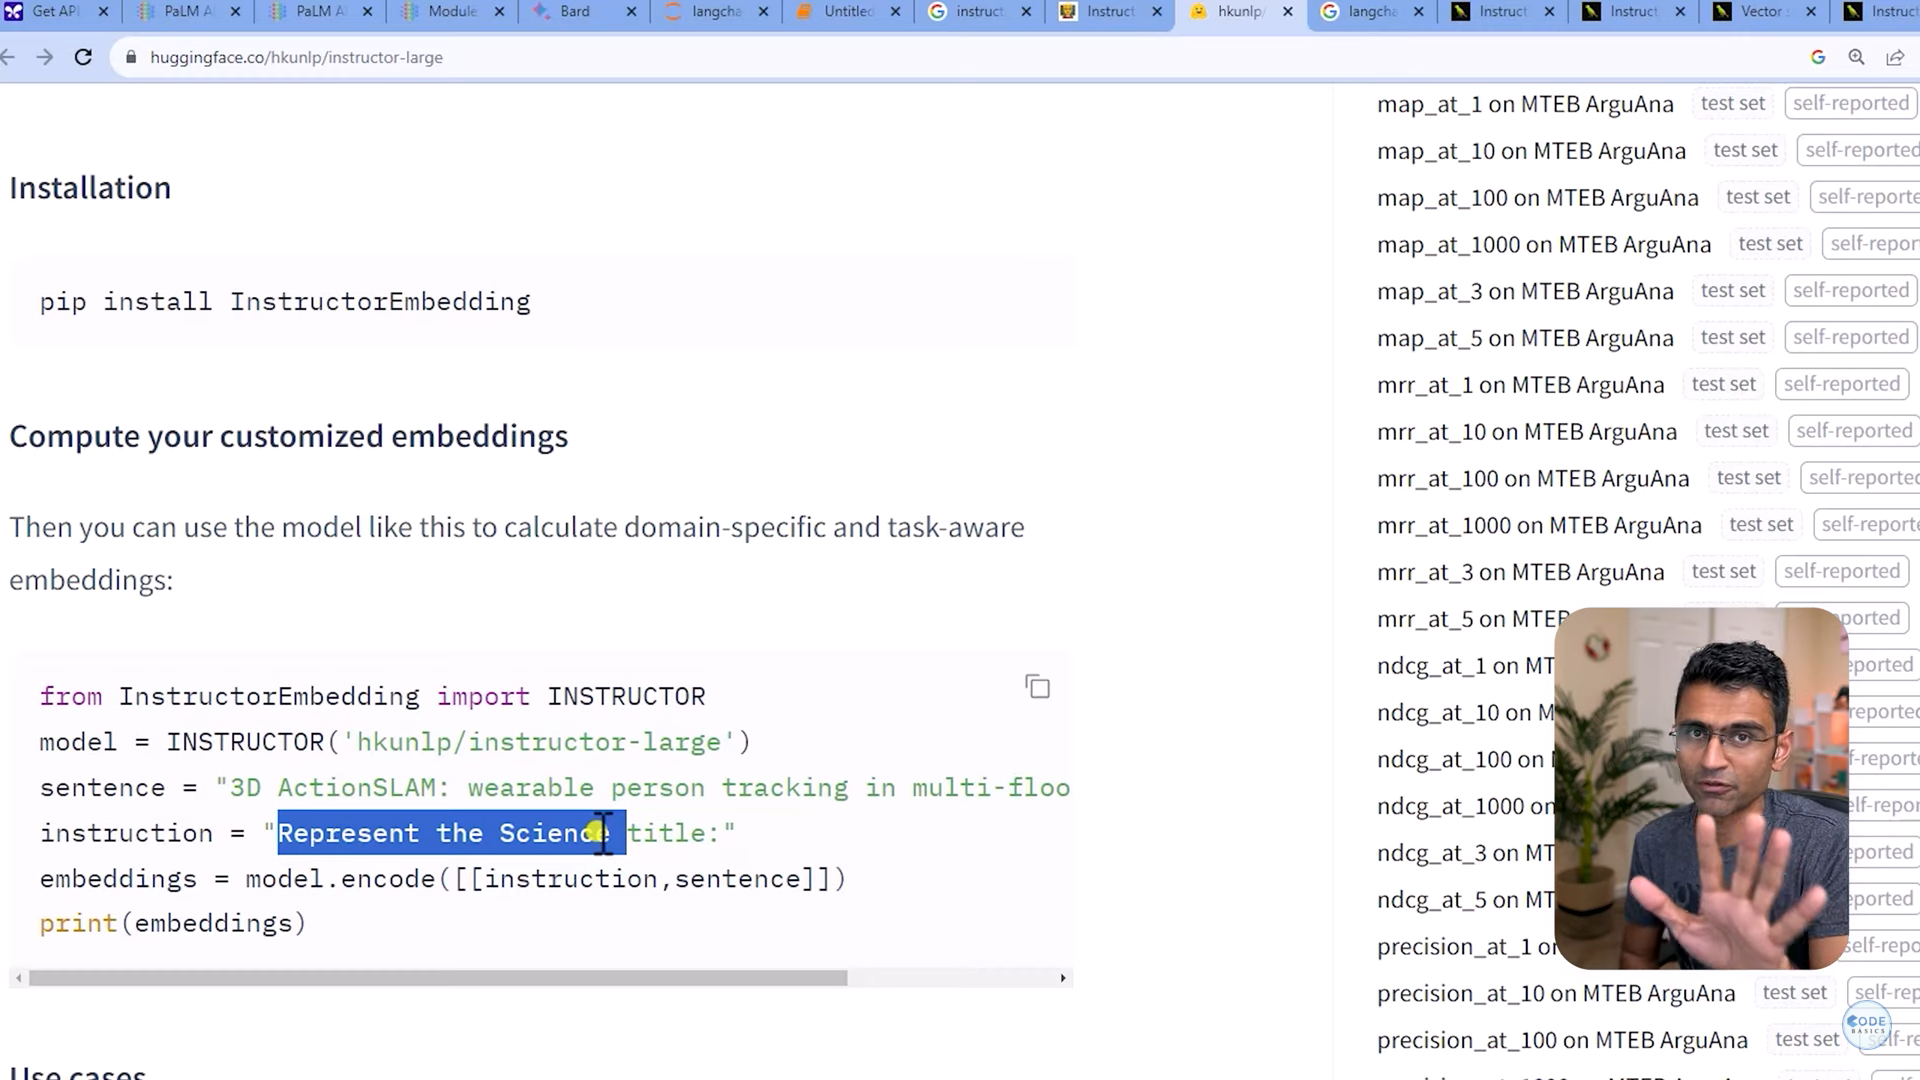

### Vector Library - FAISS

In [20]:
from langchain.embeddings import HuggingFaceInstructEmbeddings
### Vector Library
from langchain.vectorstores import FAISS
instructor_embeddings = HuggingFaceInstructEmbeddings()
# Create a FAISS instance for vector database from 'data'
vector_db = FAISS.from_documents(documents=data,embedding = instructor_embeddings)
# Create a retriever for querying the vector database
retriever = vector_db.as_retriever(score_threshold = 0.7)
rdocs = retriever.get_relevant_documents("how about job placement support?")
rdocs


load INSTRUCTOR_Transformer
max_seq_length  512


[Document(page_content='prompt: Do you provide any job assistance?\nresponse: Yes, We help you with resume and interview preparation along with that we help you in building online credibility, and based on requirements we refer candidates to potential recruiters.', metadata={'source': 'Do you provide any job assistance?', 'row': 11}),
 Document(page_content='prompt: Will this course guarantee me a job?\nresponse: We created a much lighter version of this course on YouTube available for free (click this link) and many people gave us feedback that they were able to fetch jobs (see testimonials). Now this paid course is at least 5x better than the YouTube course which gives us ample confidence that you will be able to get a job. However, we want to be honest and do not want to make any impractical promises! Our guarantee is to prepare you for the job market by teaching the most relevant skills, knowledge & timeless principles good enough to fetch the job.', metadata={'source': 'Will this 

Embeddings can be created using GooglePalm too. Also for vector database you can use chromadb as well as shown below. During our experimentation, we found hugging face embeddings and FAISS to be more appropriate for our use case

In [21]:
# google_palm_embeddings = GooglePalmEmbeddings(google_api_key=api_key)

# from langchain.vectorstores import Chroma
# vectordb = Chroma.from_documents(data,
#                            embedding=google_palm_embeddings,
#                            persist_directory='./chromadb')
# vectordb.persist()

#### Create RetrievalQA chain along with prompt template

In [22]:
from langchain.prompts import PromptTemplate

## Model will try to make things up based on knowledge it has - This process is called HALLUCINATION

### We are creating prompt because we want Model to only see CSV File.And dont make answers based on their own knowledge

prompt_template = """Given the following context and a question, generate an answer based on this context only.
In the answer try to provide as much text as possible from "response" section in the source document context without making much changes.
If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer.

CONTEXT: {context}

QUESTION: {question}"""


PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)
chain_type_kwargs = {"prompt": PROMPT}


from langchain.chains import RetrievalQA

chain = RetrievalQA.from_chain_type(llm=llm,
                            chain_type="stuff",
                            retriever=retriever,
                            input_key="query",
                            return_source_documents=True,
                            chain_type_kwargs=chain_type_kwargs)

In [23]:
chain('Do you provide job assistance and also do you provide job gurantee?')

{'query': 'Do you provide job assistance and also do you provide job gurantee?',
 'result': 'Yes, We help you with resume and interview preparation along with that we help you in building online credibility, and based on requirements we refer candidates to potential recruiters. The courses included in this bootcamp are done by 9000+ learners and many of them have secured a job which gives us ample confidence that you will be able to get a job. However, we want to be honest and do not want to make any impractical promises! Our guarantee is to prepare you for the job market by teaching the most relevant skills, knowledge & timeless principles good enough to fetch the job.',
 'source_documents': [Document(page_content='prompt: Do you provide any job assistance?\nresponse: Yes, We help you with resume and interview preparation along with that we help you in building online credibility, and based on requirements we refer candidates to potential recruiters.', metadata={'source': 'Do you prov

In [25]:
chain('Do you have javascript course')

{'query': 'Do you have javascript course',
 'result': "No, we don't offer JavaScript course currently.",
 'source_documents': [Document(page_content='prompt: I have never done programming and belong to a non-technical background. Can I take this course?\nresponse: Yes, this is the perfect course for anyone who has never done coding and wants to build a career in the IT/Data Analytics industry or just wants to perform better in their current job or business using data.', metadata={'source': 'I have never done programming and belong to a non-technical background. Can I take this course?', 'row': 24}),
  Document(page_content='prompt: I have never done programming in my life. Can I take this bootcamp?\nresponse: Yes, this is the perfect bootcamp for anyone who has never done coding and wants to build a career in the IT/Data Analytics industry or just wants to perform better in your current job or business using data.', metadata={'source': 'I have never done programming in my life. Can I t

In [30]:
chain('Where is capital of india')

{'query': 'Where is capital of india',
 'result': 'New Delhi',
 'source_documents': [Document(page_content='prompt: Why is the year 2018 missing or disappeared?\nresponse: Check this reference:\nhttps://discordapp.com/channels/1090613684163850280/1111545547426369637/1111563527753318430', metadata={'source': 'Why is the year 2018 missing or disappeared?', 'row': 67}),
  Document(page_content='prompt: Do you provide any virtual internship?\nresponse: Yes', metadata={'source': 'Do you provide any virtual internship?', 'row': 14}),
  Document(page_content='prompt: i am unable to import data from mysql in power bi ,connector issue is coming continuously i have done all steps according to connector pdf still its not resolving please guide\nresponse: Please refer to this thread: https://discord.com/channels/1090613684163850280/1107992760105054238/1107993007606730802', metadata={'source': 'i am unable to import data from mysql in power bi ,connector issue is coming continuously i have done all

In [34]:
chain('Where is tajmahal')

{'query': 'Where is tajmahal',
 'result': "located? I don't know.",
 'source_documents': [Document(page_content='prompt: Why is the year 2018 missing or disappeared?\nresponse: Check this reference:\nhttps://discordapp.com/channels/1090613684163850280/1111545547426369637/1111563527753318430', metadata={'source': 'Why is the year 2018 missing or disappeared?', 'row': 67}),
  Document(page_content="prompt: I am not allowing to post doubt in the discord group\nresponse: Sure I can guide you\n\nGo to the 'click-here-to-ask-questions' section and verify yourself here by clicking on the checkmark.", metadata={'source': 'I am not allowing to post doubt in the discord group', 'row': 43}),
  Document(page_content='prompt: i am unable to import data from mysql in power bi ,connector issue is coming continuously i have done all steps according to connector pdf still its not resolving please guide\nresponse: Please refer to this thread: https://discord.com/channels/1090613684163850280/110799276010

Sometimes Google PALM says I dont know. Sometimes it says the answer. Open AI models are good w.r.t google palm i-e Sometime it does HALLUCINATION